# CAM

## 사용 조건 
    - Flatten -> GAP로 위치정보를 갖고 있어야함. 
    
## CAM

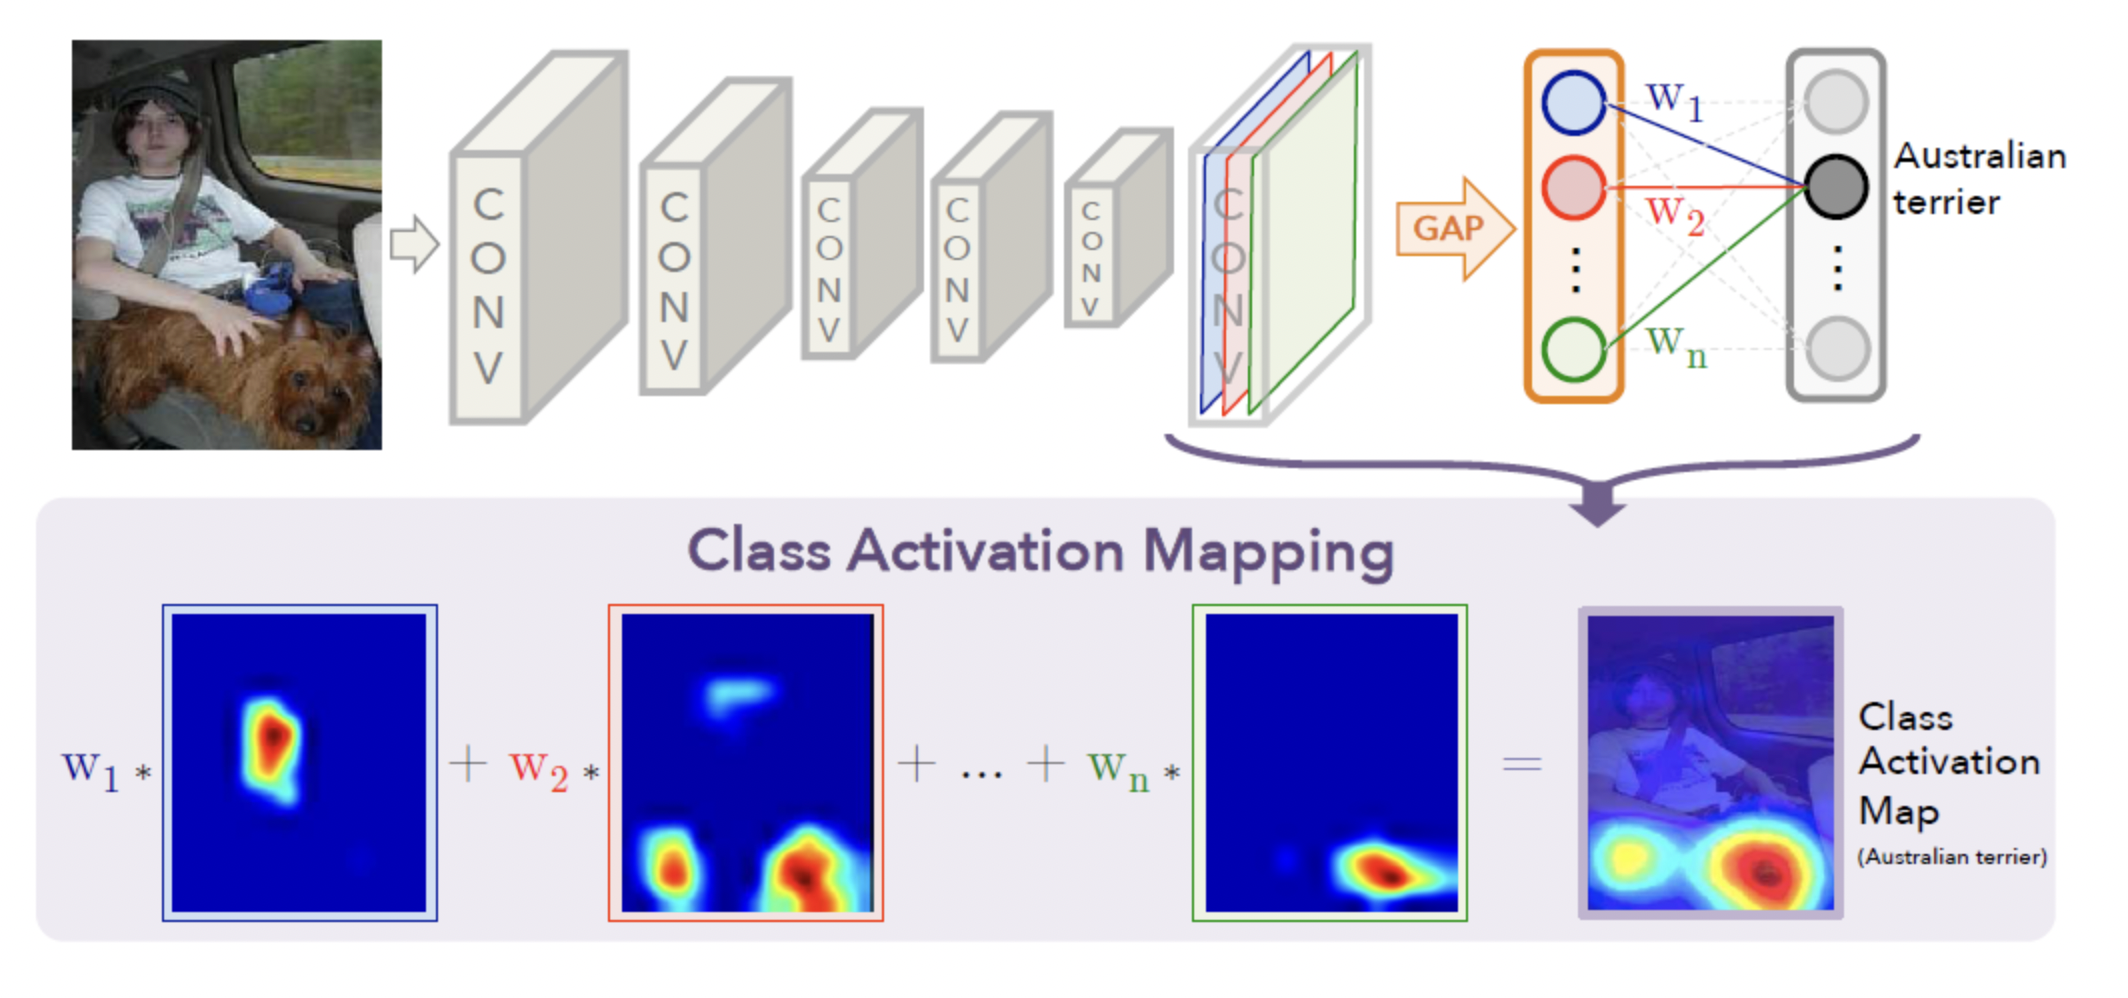
    
    - 위의 그림에서 w1~wn은 각 object의 중요도를 담는다. 
    - 최종적으로 해당 class의 weights과 feature map을 다 곱하고 sum을 함으로써 특정 class의 결정에 영향을 미치는 object가 heatmap에서 나타날 수 있는 것이다. 
    - 만약, 사진에 고양이가 있고 이 그림을 고양이라고 분류했다면, 네트워크의 고양이와 관련된 object를 담는 feature map의 weights들은 다른 feature map의 weights에 비해서 값이 클 것이다. 
    - 이 값들을 weights sum 하게 되면 고양이와 관련된 object 부분이 highlight가 될 것이다.

## 식
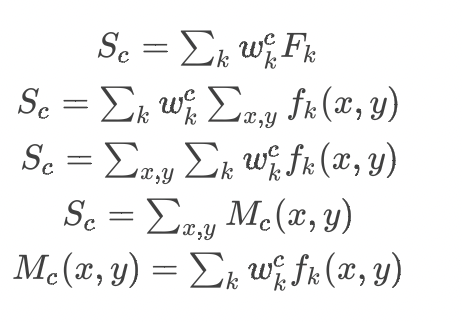

($S_c$) : 각 클래스의 점수

$M_c$(x,y) : 클래스 에 대하여 좌표 (x,y) 에 대한 영향력(Activation Value)

## code

In [ ]:
def extract_cam(model,resize_data_set,img_start_num,img_end_num):
    for i in range(img_start_num,img_end_num):
        img = resize_data_set[i]
        img_array = np.expand_dims(np.asarray(img)[:,:,:3]/255.,0)
        # get prediction result and convolution output values
        get_output = K.function([model.layers[0].input], [model.layers[-5].output, model.layers[-1].output])
        [conv_outputs, predictions] = get_output([img_array])
        class_idx = np.argmax(predictions)
        conv_outputs = conv_outputs[0,:,:,:]
        class_weights = model.layers[-1].get_weights()[0]
        # calculate cam
        cam = np.zeros(dtype=np.float32, shape=conv_outputs.shape[0:2])
        for i, w in enumerate(class_weights[:,class_idx]):
            cam += w*conv_outputs[:,:,i]
        # normalize cam and resize to fit the original image size
        cam = cam/np.max(cam)
        cam = cv2.resize(cam, (224, 224))
        # print cam image and original image
        plt.figure(figsize=(10,20))
        plt.subplot(1,2,1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.subplot(1,2,2)
        plt.imshow(cam, cmap='jet', alpha=0.8)
        plt.imshow(img, alpha=0.3)
        plt.axis('off')
        plt.show()